In [1]:
import pandas as pd
import numpy as np
import math
from scipy import linalg as la
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
1. Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
2. Find the eigenvectors and eigenvalues using SVD. Check that they are two procedure yields to same result
3. What percent of the total variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
4. Redefine the data in the basis yielded by the PCA procedure
5. Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
N=6000
np.random.seed(1995)
x1 = np.random.normal(0,1,N)
x2 = x1 + np.random.normal(0,3,N)
x3 = 2*x1 + x2
data=pd.DataFrame({"x1":x1,"x2":x2,"x3":x3})
cov_M = np.cov(data,rowvar=False)

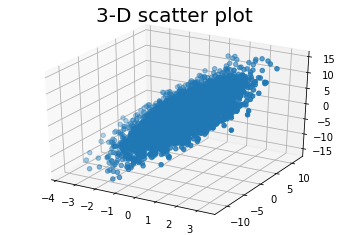

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_title("3-D scatter plot",fontsize=20)
ax.scatter(data.x1, data.x2, data.x3)

In [4]:
l, V = la.eig(cov_M) 

print("Eigenvalues via linalg\n")
print(l,"\n")

cov_linalg = np.dot(V,np.dot(np.diag(l), la.inv(V)))

check = np.allclose(cov_linalg,cov_M) ##allclose ammits some error 
                                      ##(if computation could have inifite precision they would be equal)
print("Are V L inv(V) and A equal?",check)

Eigenvalues via linalg

[ 2.72096991e+01+0.j -5.45115918e-16+0.j  2.00800272e+00+0.j] 

Are V L inv(V) and A equal? True


In [5]:
U, spectrum, Vt = la.svd(cov_M)
print ("Eigenvalues via SVD: ","\n",spectrum)

cov_svd = np.dot(U,np.dot(np.diag(spectrum),Vt))

check = np.allclose(cov_svd,cov_linalg)
print("Does SVD yields to the same result as eig decomposition?",check)

Eigenvalues via SVD:  
 [2.72096991e+01 2.00800272e+00 1.57399748e-15]
Does SVD yields to the same result as eig decomposition? True


PCA can be performed both by means of **eig decomposition of the covariance matrix** or by means of **SVD on the actual data**

In [6]:
##first method: eig decomposition of the cov_M matrix

l, V = np.linalg.eig(cov_M)
l=np.sort(l)[::-1]
Lambda=np.diag(l)
print(Lambda)

print ("First dimension accounts for: {0:.2%}".format(Lambda[0,0]/Lambda.trace()))
print ("Second dimension accounts for: {0:.2%}".format(Lambda[1,1]/Lambda.trace()))
print ("Third dimension accounts for: {0:.2%}".format(Lambda[2,2]/Lambda.trace()))



[[ 2.72096991e+01  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  2.00800272e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -5.45115918e-16]]
First dimension accounts for: 93.13%
Second dimension accounts for: 6.87%
Third dimension accounts for: -0.00%


This is something we expect since the third dimension is just a linear combination of the other two.

First dimension accounts for: 78.64%
Second dimension accounts for: 21.36%
Third dimension accounts for: 0.00%


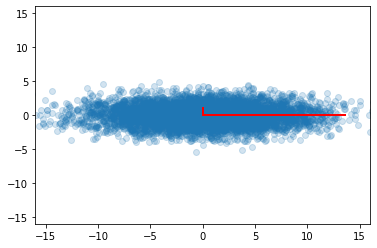

In [7]:
### PCA via SVD
U, spectrum, Vt = np.linalg.svd(data)
l_svd = spectrum**2/(N-1)
V_svd = U

print ("First dimension accounts for: {0:.2%}".format(spectrum[0]/spectrum.sum()))
print ("Second dimension accounts for: {0:.2%}".format(spectrum[1]/spectrum.sum()))
print ("Third dimension accounts for: {0:.2%}".format(spectrum[2]/spectrum.sum()))

#rotating the data
dataR = np.dot(Vt,data.T)

#dropping thedimension with smaller variability ()
dataR_del = np.delete(dataR,2,0)


plt.scatter(dataR_del[0,:], dataR_del[1,:], alpha=0.2)
for li, vi in zip(l, np.diag([1]*3)):
    plt.plot([0, 0.5*li*vi[0]], [0, 0.5*li*vi[1]], 'r-', lw=2)
plt.axis([-16,16,-16,16]);    

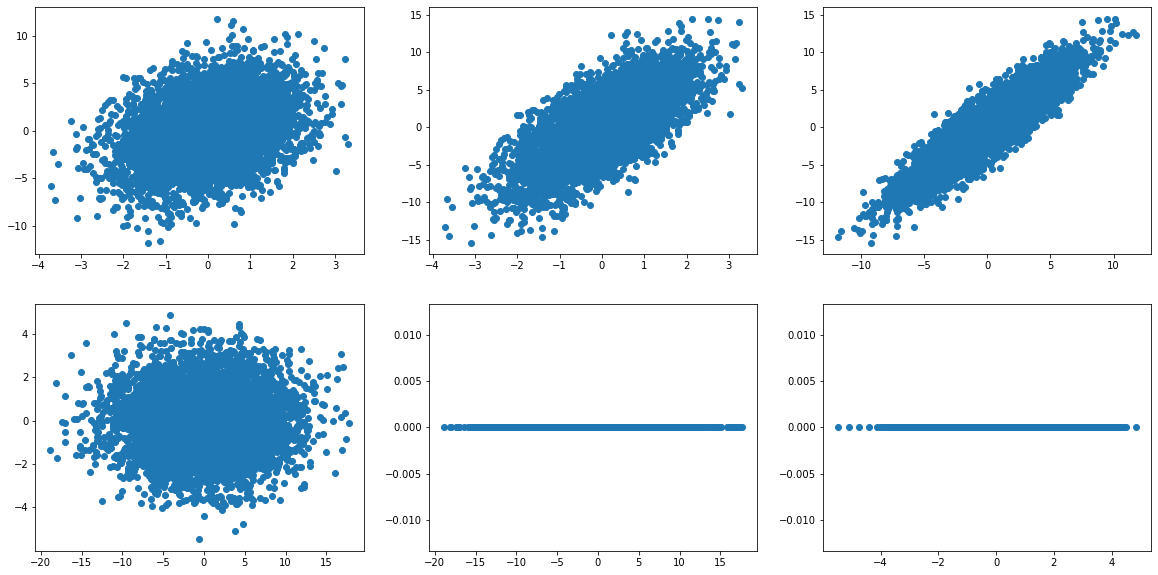

In [8]:
fig, ax = plt.subplots(2,3,figsize=(20,10))

I = (0,0,1)
J = (1,2,2)
h=0
for i,j in zip(I,J):
        ax[0,h].scatter(data.iloc[:,i],data.iloc[:,j])
        ax[1,h].scatter(dataR[i,:],dataR[j,:])
        h +=1

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [9]:
for i in range(0,10,1):
    name="noise"+str(i)
    std = np.random.uniform(1/70,1/50)
    data[name]=np.random.normal(0,std,N)
data.head()

,x1,x2,x3,noise0,noise1,noise2,noise3,noise4,noise5,noise6,noise7,noise8,noise9
0,-1.240633,-1.145464,-3.626731,-0.021970,0.025275,-0.007036,0.020106,-0.018879,0.032451,0.034414,0.000272,-0.025658,-0.028233
1,-1.470579,4.147688,1.206531,-0.000665,-0.008238,-0.012692,-0.002943,-0.010467,0.003745,-0.007220,0.010329,-0.001711,0.001660
2,2.101191,-0.266495,3.935886,0.035658,0.019451,-0.007442,-0.007561,-0.002603,0.005578,-0.021417,-0.023918,-0.000755,0.024630
3,-1.464822,-1.672643,-4.602287,-0.030939,0.010155,-0.003106,-0.002165,0.013088,0.043720,-0.020069,-0.012788,0.027735,-0.023731
4,0.817922,-4.104641,-2.468797,0.012875,-0.015904,0.025267,0.031137,0.007749,-0.005778,0.014710,-0.026739,-0.000867,-0.012896


In [16]:
##via SVD
U, spectrum, Vt = np.linalg.svd(data)


print ("First dimension accounts for: {0:.2%}".format(spectrum[0]/spectrum.sum()))
print ("Second dimension accounts for: {0:.2%}".format(spectrum[1]/spectrum.sum()))
print ("Third dimension accounts for: {0:.2%}".format(spectrum[2]/spectrum.sum()))


First dimension accounts for: 76.67%
Second dimension accounts for: 20.83%
Third dimension accounts for: 0.28%


Looking at the percentage of variability we can see that they almost are the same as what we found previously. The plot we will look exactly the same.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [28]:
datamagic = pd.read_csv('magic04.data',header=None)
datamagic = datamagic.drop(columns=10)
datamagic.head()

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [36]:
##via SVD
U, spectrum, Vt = np.linalg.svd(datamagic)

In [43]:
threshold = 99
variability = 0
i = 0
while variability < threshold:
    variability +=  spectrum[i]*100/(spectrum.sum())
    print ("Dimension ", i+1, "accounts for ", (spectrum[i]*100/(spectrum.sum())), "% of total variability")
    i+=1

Dimension  1 accounts for  51.19254103763464 % of total variability
Dimension  2 accounts for  15.181386988311145 % of total variability
Dimension  3 accounts for  10.69707082725954 % of total variability
Dimension  4 accounts for  8.572129619391143 % of total variability
Dimension  5 accounts for  6.715047862922638 % of total variability
Dimension  6 accounts for  4.879096148577775 % of total variability
Dimension  7 accounts for  2.5381972269552198 % of total variability
